# Create dataframes for image loader

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import os


import torch
from skimage import io, transform
import matplotlib.pyplot as plt
from torchvision import transforms, utils
from torchvision import datasets
from torchvision.transforms import ToTensor
import cv2
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
# from torch.optim import Adam, SGD
from torch.autograd import Variable
from torch.utils.data import DataLoader, random_split, TensorDataset, Dataset, WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torchvision import models
from torchmetrics.classification import BinaryF1Score, BinaryPrecision, BinaryRecall, BinaryAccuracy, BinaryROC, BinaryAUROC
import PIL
from PIL import Image

# visualisation
import seaborn as sns

# helpers
from tqdm import tqdm
import time
import copy
import gc
from enum import Enum

import warnings
warnings.filterwarnings('ignore')

metadata_list=['mass_case_description_test_set','mass_case_description_train_set']
#'mass_case_description_test_set','mass_case_description_train_set',
df_list=[]
for j in range(len(metadata_list)):
    print (metadata_list[j])
    df=pd.read_csv('/home/mbadhan/Desktop/mberghouse/'+metadata_list[j]+'.csv')
    print (len(df))
    
    fname=[]

    df=df.rename(columns={"file path": "filename","pathology":"class", 'image file path':'filename','cropped image file path':'patch_filename'})
###Remove multiple-counted images for whole image
    for k in range(len(df)):
        fname.append(df['filename'].loc[k])
        if k>0:
            if fname[k] == fname[k-1]:
                df.drop(k, inplace=True)
    print ('df length after removal of repeats: ', len(df))
    
    
    nan_count=0

    for i in range(len(df)):
### For whole images
        df.filename.iloc[i]='/home/mbadhan/Desktop/mberghouse/CBIS-DDSM-preprocessed/600x1000_v6/'+df.filename.iloc[i].rsplit('/',3)[0]+'/1-1.png'
        #df.filename[i]='F:/CBIS_DDSM_redo/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM-png/'+df.filename[i].rsplit('/',3)[0]+'/1-1.png'
        if 'MALIGNANT' in df['class'].iloc[i]:
            df['class'].iloc[i]=1
        else:
            df['class'].iloc[i]=0
    df_list.append(df)
    
### For patches
        ##i=i-nan_count
       ## df.filename.iloc[i]='C:/Users/marcb/Desktop/CBIS-DDSM-preprocessed/v4_3d/'+df.filename.iloc[i].rsplit('/',3)[0]+'/1-1.jpg'
        ##df.filename[i]='F:/CBIS_DDSM_redo/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM-png/'+df.filename[i].rsplit('/',3)[0]+'/1-1.png'
### For Masses
#         try:
#             path1 = 'F:/CBIS_DDSM/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM-mask/'+df.patch_filename.iloc[i].rsplit('/',3)[0]
#             folder1=os.listdir(path1)[0]
#             folder2=os.listdir(os.path.join(path1,folder1))[0]
#             img = os.listdir(os.path.join(path1,folder1,folder2))
#             im0_path=os.path.join(path1,folder1,folder2,img[0])
#             im0=cv2.imread(im0_path)
#             if len(img)>1:
#                 if np.median(im0)==0:
#                     img_path = os.path.join(path1,folder1,folder2,img[1])
#                 else:
#                     img_path = im0_path
#             else:
#                 if np.median(im0)==0:
#                     img_path = np.nan
#                     nan_count = nan_count+1
#                 else:
#                     img_path = im0_path
#             df.patch_filename.iloc[i]=img_path
#         except:
#             path1 = 'F:/CBIS_DDSM/manifest-ZkhPvrLo5216730872708713142/cropped/'+df.patch_filename.iloc[i].rsplit('/',3)[0]
#             folder1=os.listdir(path1)[0]
#             folder2=os.listdir(os.path.join(path1,folder1))[0]
#             img = os.listdir(os.path.join(path1,folder1,folder2))
#             im0_path=os.path.join(path1,folder1,folder2,img[0])
#             im0=cv2.imread(im0_path)
#             if len(img)>1:               
#                 if np.median(im0)==0:
#                     img_path = os.path.join(path1,folder1,folder2,img[1])
#                 else:
#                     img_path = im0_path
#             else:
#                 if np.median(im0)==0:
#                     img_path = np.nan
#                     nan_count = nan_count+1
#                 else:
#                     img_path = im0_path
#             df.patch_filename.iloc[i]=img_path
#             #df.dropna(inplace=True)
        
#         if 'MALIGNANT' in df['class'].iloc[i]:
#             df['class'].iloc[i]=1
#         else:
#             df['class'].iloc[i]=0
#     df.dropna(inplace=True)
#     df_list.append(df)
#df_list
# df_mass_test=df_list[0]
# df_mass_train=df_list[1]
df_calc_test=df_list[0]
df_calc_train=df_list[1]

# filenames=[]
# labels=[]
# for i in range(len(df_mass_train)):
#     filenames.append(df_mass_train.filename.iloc[i])
#     labels.append(df_mass_train['class'].iloc[i])

# filenames_test=[]
# labels_test=[]
# for i in range(len(df_mass_test)):
#     filenames_test.append(df_mass_test.filename.iloc[i])
#     labels_test.append(df_mass_test['class'].iloc[i])
    
# filenames_calc=[]
# labels_calc=[]
# for i in range(len(df_calc_train)):
#     filenames_calc.append(df_calc_train.filename.iloc[i])
#     labels_calc.append(df_calc_train['class'].iloc[i])

# filenames_test_calc=[]
# labels_test_calc=[]
# for i in range(len(df_calc_test)):
#     filenames_test_calc.append(df_calc_test.filename.iloc[i])
#     labels_test_calc.append(df_calc_test['class'].iloc[i])

mass_case_description_test_set
378
df length after removal of repeats:  361
mass_case_description_train_set
1318
df length after removal of repeats:  1231


In [2]:
filenames_calc=[]
labels_calc=[]
for i in range(len(df_calc_train)):
    filenames_calc.append(df_calc_train.filename.iloc[i])
    labels_calc.append(df_calc_train['class'].iloc[i])

filenames_test_calc=[]
labels_test_calc=[]
for i in range(len(df_calc_test)):
    filenames_test_calc.append(df_calc_test.filename.iloc[i])
    labels_test_calc.append(df_calc_test['class'].iloc[i])

In [3]:

import torchvision
import numpy.matlib as np_mlb
#torchvision.disable_beta_transforms_warning()
#import torchvision.transforms.v2 as transforms

#plt.ion()   # interactive mode

##########################################
##### HERE ARE THE AUGMENTATIONS!!! ######
##########################################
# affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))

augmentator = transforms.Compose([
    # input for augmentator is always PIL image
    transforms.ToPILImage(),
    
    transforms.ColorJitter(brightness=(.6,1.2)),
#     transforms.Pad(padding=(12,3)),
    #torchvision.models.EfficientNet_V2_S_Weights.IMAGENET1K_V1.transforms(),
#     transforms.RandomAdjustSharpness(1.5, p=0.5),
#     transforms.RandomPhotometricDistort(),
    #transforms.RandomZoomOut(fill = 0, side_range = (1, 1.3)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomRotation(8),
#     transforms.Resize(size=(500,300)),
    #transforms.RandomAffine(degrees=(0,10),translate=(0.01, 0.02),  shear=(.5,.5)),
    #transforms.GaussianBlur(kernel_size=(3, 3), sigma=(.5)),
#     transforms.RandomEqualize(p=.1),
#    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    #transforms.ConvertImageDtype(torch.float32),# return it as a tensor and transforms it to [0, 1]
])

small_aug = transforms.Compose([
    # input for augmentator is always PIL image
    transforms.ToPILImage(),
    #transforms.Pad(10),
    #torchvision.models.EfficientNet_V2_S_Weights.IMAGENET1K_V1.transforms()
    transforms.ToTensor(),
    #transforms.v2.ConvertImageDtype(torch.float32)# return it as a tensor and transforms it to [0, 1]
])

def show_landmarks(image, label):
    """Show image with landmarks"""
    plt.imshow(image)
    if label==0:
        classif='Benign'
    else:
        classif='Malignant'
    print ('Class: ',classif)
    plt.pause(0.001)  # pause a bit so that plots are updated

class CBISDataset(Dataset):
    """CBIS-DDSM dataset."""

    def __init__(self, labels, filenames, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = labels
        self.filenames = filenames
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        fname = self.filenames[idx]
        image = cv2.imread(fname)
#         image = cv2.resize(image, (344,344))
#         image = (((image-np.min(image))/(np.max(image)-np.min(image)))*255).astype('uint8')
#         clahe = cv2.createCLAHE(clipLimit = 2,tileGridSize=(12,12))
#         image = clahe.apply(image[:,:,0])
#         image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
       # image = torchvision.io.read_image(fname)#, torchvision.io.ImageReadMode.RGB)
       # image = image.repeat([3, 1, 1])
        label = self.labels[idx]    
        if self.transform:
            image = self.transform(image)

        return image, label

In [4]:
# filenames_calc.pop(375)
# filenames_calc.pop(494)
# filenames_calc.pop(705)
# filenames_calc.pop(928)
# filenames_calc.pop(928)
# filenames_calc.pop(928)
# labels_calc.pop(375)
# labels_calc.pop(494)
# labels_calc.pop(705)
# labels_calc.pop(928)
# labels_calc.pop(928)
# labels_calc.pop(928)

In [5]:
# filenames_calc.pop(520)
# filenames_calc.pop(520)
# filenames_calc.pop(838)
# filenames_calc.pop(1107)
# filenames_calc.pop(1107)

# labels_calc.pop(520)
# labels_calc.pop(520)
# labels_calc.pop(838)
# labels_calc.pop(1107)
# labels_calc.pop(1107)

In [6]:
dataset = CBISDataset(labels_calc,filenames_calc,transform=augmentator)

val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
test_dataset = CBISDataset(labels_test_calc,filenames_test_calc, transform=small_aug)
val_size =  len(val_dataset)
train_size = len(train_dataset)

Shape of X [N, C, H, W]: torch.Size([8, 3, 1000, 600])
Shape of y: torch.Size([8]) torch.int64


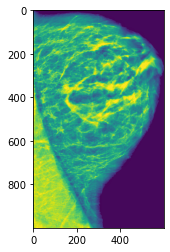

In [7]:
batch_size = 8
#try pin memory = False

# Create data loaders.
#train_dataloader = DataLoader(dataset, batch_size=batch_size,
#                        shuffle=True)#, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size,shuffle=False, pin_memory = True,num_workers=batch_size, drop_last=True)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True, pin_memory = True,num_workers=batch_size, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle = True, pin_memory = True,num_workers=batch_size, drop_last=True)


for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    #img=X
    break
plt.imshow(X[0,0,:,:])

In [8]:

    
    
# create class for earlystopping
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_loss = np.inf

    def early_stop(self, loss):
        if loss <= self.min_loss:
            self.min_loss = loss
            self.counter = 0
        elif loss > (self.min_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False
    
    
def BCELoss_class_weighted(weights):
    """
    weights[0] is weight for class 0 (negative class)
    weights[1] is weight for class 1 (positive class)
    """
    def loss(y_pred, target):
        y_pred = torch.clamp(y_pred,min=1e-7,max=1-1e-7) # for numerical stability
        bce = - weights[1] * target * torch.log(y_pred) - (1 - target) * weights[0] * torch.log(1 - y_pred)
        return torch.mean(bce)

    return loss

def find_optim_thres(fpr, tpr, thresholds):
    optim_thres = thresholds[0]
    inx = 0
    min_dist = 1.0
    for i in range(len(fpr)):
        dist = np.linalg.norm(np.array([0.0, 1.0]) - np.array([fpr[i], tpr[i]]))
        if dist < min_dist:
            min_dist = dist
            optim_thres = thresholds[i]
            inx = i
            
    return optim_thres, inx


In [9]:
#efficientnetv2_s
#ecaresnext50t_32x4d
#ecaresnet50d
#ecaresnet50t
#ecaresnet101d
#efficientnet_b3_gn
#efficientnet_b3
# 'halo2botnet50ts_256',
# , 'halonet26t',
# , 'halonet50ts',
# , 'halonet_h1',
# , 'haloregnetz_b',
#legacy_seresnet50
#mobilenetv3_large_075
#mobilenetv3_small_100
#seresnet50
#seresnext50_32x4d
#skresnet50
#ssl_resnet50
#swsl_resnet50
#visformer_small
#tv_resnet50
#resnest50d  #split Attention
#regnetx_040
#twins_pcpvt_base
#twins_svt_base
# import timm
# timm.list_models()
import timm
timm.list_models()

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'cbam_resnet34',
 'ceca_resnet34',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet

In [11]:
def train_model(trial):
    import wandb
    
    lr = trial.suggest_loguniform("lr", 6e-6, 6e-5)
    wd = trial.suggest_loguniform("wd", 1e-5, 1e-1)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.3)
    hidden_size = trial.suggest_categorical("hidden_size", [64,128])
    #batch_size = trial.suggest_categorical("batch_size", [8, 12])
    num_epochs = trial.suggest_int('num_epochs',16,24)
    optimizer_name = trial.suggest_categorical("optimizer_name", ["NAdam", "RMSprop"])
    model_name = trial.suggest_categorical("model_name", ["ssl_cbam_resnet50"])
    
#     "cbam_resnet34","ssl_cbam_resnet50", "ssl_se_resnet50", ""
#                                                           "se_resnet34", "split_resnet34","gather_resnet34","global_resnet34",
#                                                          "eca_resnet34",
#   efficientnet_b2","tf_efficientnet_b3",
#   "twins_svt_base","regnetx_064",
#   "resnest50d","tv_resnet50","seresnet50","ssl_resnet50",
#   "efficientnet_b3","ecaresnet50d","ecaresnext50t_32x4d",
#   "darknet53","gcresnet50t"]
    #c = round(trial.suggest_int('c',200,800))
#     model_name='densenet169'
    
    # start a new wandb run to track this script
    wandb.init(
        # set the wandb project where this run will be logged
        project="Optuna Model and Hyperparameter Training",
        # track hyperparameters and run metadata
        config={
        "learning_rate": lr,
        "architecture": model_name,
        "dataset": "600x1000-v6-mass",
        "epochs": num_epochs,
        "batch size": batch_size,
        "hidden size": hidden_size, 
        "optimizer_name": optimizer_name,
        "dropout_rate": dropout_rate,
        "weight decay": wd,       
        }
    )
    
    since = time.time()
    metricf1 = BinaryF1Score()
    precision = BinaryPrecision()
    recall = BinaryRecall()
    accuracy = BinaryAccuracy()
    roc = BinaryROC()
    auc = BinaryAUROC()
    #best_model_wts = model.state_dict()
    stop_count = 0
    train_stop = 0
    best_f1 = -1.0
    train_metrics = {'loss' : [], 'acc' : [], 'f1': [], 'precision': [], 'recall': [], 'auc': []}
    val_metrics = {'loss' : [], 'acc' : [], 'f1': [], 'precision': [], 'recall': [], 'auc': []}
    # inital threshold for first epoch, it will change afterwards
    threshold = 0.5
    sched_steps=[]
    print('Starting training...')
    print('-' * 20)
    
    
    ## Import Model
    import timm
    model = timm.create_model(model_name, pretrained=True)
    num_in_features = model.get_classifier().in_features
    # Replace the existing classifier. It's named: classifier
    num_in_features = model.get_classifier().in_features
    for name, param in model.named_parameters():
    #     print (name)
        ijk=0
    # Replace the existing classifier. It's named: classifier
    if "head.fc" in name:
        model.head.fc = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(in_features=num_in_features, out_features=hidden_size, bias=False),
        nn.LeakyReLU(.1,inplace=True),
        nn.Dropout(dropout_rate),
        nn.Linear(in_features=hidden_size, out_features=1, bias=False),
        nn.Sigmoid())
    elif "fc" in name:
        model.fc = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(in_features=num_in_features, out_features=hidden_size, bias=False),
        nn.LeakyReLU(.1,inplace=True),
        nn.Dropout(dropout_rate),
        nn.Linear(in_features=hidden_size, out_features=1, bias=False),
        nn.Sigmoid())
    elif "classifier" in name:
        model.classifier = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(in_features=num_in_features, out_features=hidden_size, bias=False),
        nn.LeakyReLU(.1,inplace=True),
        nn.Dropout(dropout_rate),
        nn.Linear(in_features=hidden_size, out_features=1, bias=False),
        nn.Sigmoid())
    elif "head" in name:
        model.head = nn.Sequential(
        nn.Dropout(dropout_rate),
        nn.Linear(in_features=num_in_features, out_features=hidden_size, bias=False),
        nn.LeakyReLU(.1,inplace=True),
        nn.Dropout(dropout_rate),
        nn.Linear(in_features=hidden_size, out_features=1, bias=False),
        nn.Sigmoid())
    print ('model imported')
    ## Model Imported
    torch.cuda.empty_cache() 

    device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
    if torch.cuda.is_available():
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.benchmark = True

    
    if optimizer_name == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    elif optimizer_name == "AdamW":
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    elif optimizer_name == "NAdam":
        optimizer = torch.optim.NAdam(model.parameters(), lr=lr, weight_decay=wd)
    elif optimizer_name == "RAdam":
        optimizer = torch.optim.RAdam(model.parameters(), lr=lr, weight_decay=wd)

    elif optimizer_name == "Adadelta":
        optimizer = torch.optim.Adadelta(model.parameters(), lr=lr, weight_decay=wd)
    elif optimizer_name == "Adagrad":
        optimizer = torch.optim.Adagrad(model.parameters(), lr=lr, weight_decay=wd)
    elif optimizer_name == "Adamax":
        optimizer = torch.optim.Adamax(model.parameters(), lr=lr, weight_decay=wd)
    elif optimizer_name == "RMSprop":
        optimizer = torch.optim.RMSprop(model.parameters(), lr=lr, weight_decay=wd)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=wd)
        
    scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 400, T_mult=2, eta_min=1e-12, last_epoch=- 1, verbose=False)
    model.to(device)


    criterion = nn.BCELoss()

    test_size=len(test_dataset)
    dataloaders = {'train' : train_dataloader, 'val' : val_dataloader}
    dataset_sizes = {'train': train_size, 'val' : val_size}


#     model, train_metrics, val_metrics, sched_steps = train_model(model, criterion, optimizer, [scheduler,scheduler1], num_epochs=e1)
#     optimizer = torch.optim.RMSprop(model.parameters(), lr=lr2, weight_decay=wd1)
#     scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 400, T_mult=2, eta_min=1e-12, last_epoch=- 1, verbose=False)

    
    for epoch in range(num_epochs):
        if stop_count >= 8:
            print('Early stopping due to lack of validation improvement')
            break
        
        if train_stop == 1:
            print('Early stopping due to overtraining')
            break
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            # empty 'all' tensors for saving
            # for calculating aoc at the end of epoch, and for calculating new threshold
            all_outputs = torch.Tensor([])
            all_labels = torch.Tensor([])
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            n_samples = 0
            n_correct = 0
            running_f1 = 0.0
            # Iterate over data.
#             print(f'{phase} for epoch {epoch + 1}')
            for inputs, labels in dataloaders[phase]:
                labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)               
                #labels=torch.tensor(labels)
                inputs = inputs.float()
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)

                    # concatenating all outputs and labels for calculation aoc and new threshold
                    all_outputs = torch.cat((all_outputs, outputs.to('cpu')))
                    all_labels = torch.cat((all_labels, labels.to('cpu')))                  

                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
#                         scheduler.step()

                running_loss += loss.item()
                # collect any unused memmory
                #gc.collect()
                torch.cuda.empty_cache()           
            # statistics
#             scheduler.step()
            epoch_loss = running_loss / len(dataloaders[phase])            
            all_labels=all_labels.to(dtype=torch.long)
            fpr, tpr, thresholds = roc(all_outputs, all_labels)
            epoch_auc = auc(all_outputs, all_labels)
            threshold, _ = find_optim_thres(fpr, tpr, thresholds)
            epoch_f1 = metricf1(all_outputs > threshold, all_labels)
            epoch_acc = accuracy(all_outputs > threshold, all_labels)
#             epoch_precision = precision(all_outputs > threshold, all_labels)
#             epoch_recall = recall(all_outputs > threshold, all_labels)
#             print(f'{phase} F1 is {epoch_f1}')            
            # save all of the statistics for latter analysis
            if phase == 'train':
                wandb.log({"train_acc": epoch_acc, "train_loss": epoch_loss, "train_f1": epoch_f1, "train_auc": epoch_auc})
                if train_loss <=.35:
                    train_stop = 1
#train_metrics['loss'].append(epoch_loss)
#                 train_metrics['acc'].append(epoch_acc)
#                 train_metrics['f1'].append(epoch_f1)
# #                 train_metrics['precision'].append(epoch_precision)
# #                 train_metrics['recall'].append(epoch_recall)
#                 train_metrics['auc'].append(epoch_auc)
            else:
                wandb.log({"val_acc": epoch_acc, "val_loss": epoch_loss, "val_f1": epoch_f1,  "val_auc": epoch_auc})
                val_metrics['loss'].append(epoch_loss)
#                 val_metrics['acc'].append(epoch_acc)
                val_metrics['f1'].append(epoch_f1)
#                 val_metrics['precision'].append(epoch_precision)
#                 val_metrics['recall'].append(epoch_recall)
#                 val_metrics['auc'].append(epoch_auc)

                if val_metrics['f1'][-1] > best_f1:
                    best_f1 = val_metrics['f1'][-1]

               
        # cant be formated in strin g
#         tr_loss, tr_acc, tr_f1, tr_prec, tr_rec, tr_auc = train_metrics['loss'][-1], train_metrics['acc'][-1],  train_metrics['f1'][-1], train_metrics['precision'][-1], train_metrics['recall'][-1], train_metrics['auc'][-1]
        val_loss, val_f1 = val_metrics['loss'][-1], val_metrics['f1'][-1]
#         lr = optimizer.param_groups[0]['lr']
        print(f'Epoch {epoch + 1}/{num_epochs}, learning rate: {lr}')
#         print(f'Train Loss: {tr_loss:.4f}, Train Acc: {tr_acc:.4f}, Train f1: {tr_f1:.4f}, Train Precision: {tr_prec:.4f}, Train Recall: {tr_rec:.4f}, Train AUC: {tr_auc:.4f}')
        print(f'Valitadion Loss: {val_loss:.4f}, Val f1: {val_f1:.4f}') 
        trial.report(val_f1, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
            
        gc.collect()
        torch.cuda.empty_cache() 
        
        
#         best_f1=val_f1

             
        if val_f1>=best_f1:
#             best_f1_=val_f1
            stop_count = 0
        else:
            stop_count = stop_count + 1
                
           
    ##################        
    ### Test Model ###
    ##################
                
    for inputs, labels in test_dataloader:
        labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)               
        inputs = inputs.float()
        inputs = inputs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
        # zero the parameter gradients
            outputs = model(inputs)
            #preds = (outputs > threshold).double()
            # concatenating all outputs and labels for calculation aoc and new threshold
            all_outputs = torch.cat((all_outputs, outputs.to('cpu')))
            all_labels = torch.cat((all_labels, labels.to('cpu')))                  
            #print(labels)
            # _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
        running_loss += loss.item()
        #n_correct += (preds == labels).sum().item()
        # collect any unused memmory
        gc.collect()
        torch.cuda.empty_cache()  
        
    # statistics
    test_loss = running_loss / len(test_dataloader)            
    # find true positive and false positive rates for ROC curve
    #print ('outputs: ', all_outputs, 'labels', all_labels)
    all_labels=all_labels.to(dtype=torch.long)
    fpr, tpr, thresholds = roc(all_outputs, all_labels)
    test_auc = auc(all_outputs, all_labels)
    # find new threshold
    threshold, _ = find_optim_thres(fpr, tpr, thresholds)
    print(f'New threshold is {threshold}')
    # calculate metrics using new optimized threshold
    test_f1 = metricf1(all_outputs > threshold, all_labels)
    test_acc = accuracy(all_outputs > threshold, all_labels)
    
    # save all of the statistics for latter analysis
#     test_metrics['loss'].append(test_loss)
#     test_metrics['acc'].append(test_acc)
#     test_metrics['f1'].append(test_f1)
#     test_metrics['auc'].append(test_auc)               
    time_elapsed = time.time() - since
    wandb.log({"test_acc": test_acc, "test_loss": test_loss, "test_f1": test_f1, "test_auc": test_auc})
    print(f'F1 Score = : {test_f1:4f}')
    print(f'AUC Score = : {test_auc:4f}')
    print(f'Acc Score = : {test_acc:4f}')
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    #print(f'Best val auc: {best_f1:4f}')
    wandb.finish()
    
    # load best model weights
#     model.load_state_dict(best_model_wts)
    return test_f1

In [12]:
import optuna
# earlystoper = EarlyStopper(patience = 50)
study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=20))
study.optimize(train_model,n_trials=80)
best_params = study.best_params
best_f1 = study.best_value
print ('best params: {best_params}')
print ('best f1: {best_f1}')



[I 2023-04-16 21:25:54,757] A new study created in memory with name: no-name-bd57bbb0-d019-48bf-b802-944a1f1c4916
wandb: Currently logged in as: mberghouse (mammogram_project). Use `wandb login --relogin` to force relogin


Starting training...
--------------------
model imported
Epoch 1/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.6849, Val f1: 0.5902
Epoch 2/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.6581, Val f1: 0.7111
Epoch 3/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.6434, Val f1: 0.6880
Epoch 4/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.6495, Val f1: 0.6545
Epoch 5/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.6547, Val f1: 0.6140
Epoch 6/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.6803, Val f1: 0.6400
Epoch 7/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.6178, Val f1: 0.6935
Epoch 8/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.6171, Val f1: 0.6818
Epoch 9/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.5522, Val f1: 0.7258
Epoch 10/21, learning rate: 1.8725870948378906e-05
Valitadion Loss: 0.5773, Val f1: 0.6935
Epoch 11/21, learning rate: 1.872587094837

test_acc,▁
test_auc,▁
test_f1,▁
test_loss,▁
train_acc,▁▂▂▃▃▃▃▄▅▅▅▆▆▆▇▇▇▇▇██
train_auc,▁▂▂▃▃▄▄▄▅▅▆▆▇▇▇▇▇▇███
train_f1,▁▂▂▂▃▃▃▄▅▅▅▆▆▆▆▇▇▇███
train_loss,███▇▇▇▇▆▆▅▅▄▄▄▃▃▃▂▂▂▁
val_acc,▁▄▄▄▃▂▄▃▅▄▅▅▇▆▆█▅▆▇▇█
val_auc,▁▄▄▄▃▃▅▄▆▅▆▅▇▆▆▇▆▆▇▇█
val_f1,▁▅▅▃▂▃▅▄▆▅▅▆▇▇▆█▅▅█▇█


[I 2023-04-16 21:34:19,115] Trial 0 finished with value: 0.6967418789863586 and parameters: {'lr': 1.8725870948378906e-05, 'wd': 0.0023134889519784998, 'dropout_rate': 0.1811053510455106, 'hidden_size': 64, 'num_epochs': 21, 'optimizer_name': 'NAdam', 'model_name': 'eca_resnet34'}. Best is trial 0 with value: 0.6967418789863586.


Starting training...
--------------------
model imported
Epoch 1/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6864, Val f1: 0.6325
Epoch 2/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6842, Val f1: 0.6094
Epoch 3/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6727, Val f1: 0.6207
Epoch 4/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6772, Val f1: 0.5833
Epoch 5/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6649, Val f1: 0.7015
Epoch 6/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6495, Val f1: 0.6316
Epoch 7/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6370, Val f1: 0.6719
Epoch 8/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6255, Val f1: 0.6496
Epoch 9/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.6286, Val f1: 0.7077
Epoch 10/20, learning rate: 1.0283022543260107e-05
Valitadion Loss: 0.5927, Val f1: 0.6897
Epoch 11/20, learning rate: 1.028302254326

test_acc,▁
test_auc,▁
test_f1,▁
test_loss,▁
train_acc,▁▃▃▄▃▄▄▄▅▅▅▆▆▇▆▇▇███
train_auc,▁▃▃▃▄▄▄▅▅▆▆▆▇▇▇▇████
train_f1,▁▃▂▃▃▄▄▄▅▆▅▆▆▇▇▇████
train_loss,███▇▇▇▆▆▅▅▅▅▃▄▃▃▂▁▁▁
val_acc,▄▁▃▁▅▄▄▅▆▆▆▇▅▇█▆▄▆▅▇
val_auc,▄▁▂▁▃▄▄▅▅▆▇▇▆██▇▆▇▇█
val_f1,▃▂▃▁▆▃▅▄▆▅▄█▅▅▆▅▃▅▅▇


[I 2023-04-16 21:42:43,673] Trial 1 finished with value: 0.6512702107429504 and parameters: {'lr': 1.0283022543260107e-05, 'wd': 0.0006320233927520826, 'dropout_rate': 0.25827871809933206, 'hidden_size': 64, 'num_epochs': 20, 'optimizer_name': 'NAdam', 'model_name': 'eca_resnet34'}. Best is trial 0 with value: 0.6967418789863586.


Starting training...
--------------------
model imported
Epoch 1/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 0.6652, Val f1: 0.6667
Epoch 2/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 0.7038, Val f1: 0.5439
Epoch 3/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 0.6779, Val f1: 0.5893
Epoch 4/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 3.7092, Val f1: 0.4715
Epoch 5/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 0.6867, Val f1: 0.5714
Epoch 6/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 0.7099, Val f1: 0.5484
Epoch 7/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 0.6704, Val f1: 0.6504
Epoch 8/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 0.6789, Val f1: 0.6573
Epoch 9/17, learning rate: 4.9185833002248164e-05
Valitadion Loss: 0.6791, Val f1: 0.5872
Early stopping due to lack of validation improvement
New threshold is 0.4999544024467468
F1 Score = : 0.567237
AUC Score = : 0.661942

test_acc,▁
test_auc,▁
test_f1,▁
test_loss,▁
train_acc,▄▆█▁▃▆▄▅▄
train_auc,▂▇█▂▁▅▄▄▂
train_f1,▃▃▆▃▄█▁▆▅
train_loss,▆▂▁▄▇▅▇▄█
val_acc,█▅▇▁▆▄█▆▇
val_auc,█▅▇▁▇▅█▅▇
val_f1,█▄▅▁▅▄▇█▅


[I 2023-04-16 21:46:36,073] Trial 2 finished with value: 0.567237138748169 and parameters: {'lr': 4.9185833002248164e-05, 'wd': 0.03396078929594869, 'dropout_rate': 0.20927055314713688, 'hidden_size': 64, 'num_epochs': 17, 'optimizer_name': 'NAdam', 'model_name': 'eca_resnet34'}. Best is trial 0 with value: 0.6967418789863586.


Starting training...
--------------------
model imported
Epoch 1/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.6736, Val f1: 0.6435
Epoch 2/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.6704, Val f1: 0.5872
Epoch 3/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.6619, Val f1: 0.6102
Epoch 4/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.6540, Val f1: 0.6949
Epoch 5/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.6492, Val f1: 0.6838
Epoch 6/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.6287, Val f1: 0.6891
Epoch 7/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.6356, Val f1: 0.6885
Epoch 8/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.6204, Val f1: 0.6833
Epoch 9/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.5855, Val f1: 0.6727
Epoch 10/19, learning rate: 8.557618330103024e-06
Valitadion Loss: 0.5899, Val f1: 0.6833
Epoch 11/19, learning rate: 8.557618330103024e-06
Va

test_acc,▁
test_auc,▁
test_f1,▁
test_loss,▁
train_acc,▁▂▂▂▃▃▄▅▅▅▆▆▆▇▆▇▇██
train_auc,▁▂▂▃▃▃▄▅▅▅▆▆▆▇▇▇▇██
train_f1,▁▁▂▃▃▂▄▅▅▅▅▆▆▇▇▇▇██
train_loss,██▇▇▇▇▆▅▅▅▄▄▄▃▂▂▂▁▁
val_acc,▃▁▁▆▅▅▅▅▆▅▇▅▄▄▇▇▅▇█
val_auc,▁▁▁▃▃▄▃▄▆▆▇▅▆▄▅▇▆▆█
val_f1,▄▁▂▆▆▆▆▆▅▆▇▆▅▆▆█▆▇█


[I 2023-04-16 21:54:26,604] Trial 3 finished with value: 0.6729411482810974 and parameters: {'lr': 8.557618330103024e-06, 'wd': 0.00024222209978736994, 'dropout_rate': 0.10907787837296505, 'hidden_size': 64, 'num_epochs': 19, 'optimizer_name': 'RMSprop', 'model_name': 'eca_resnet34'}. Best is trial 0 with value: 0.6967418789863586.


Starting training...
--------------------
model imported
Epoch 1/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.6781, Val f1: 0.6107
Epoch 2/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.6753, Val f1: 0.6087
Epoch 3/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.7016, Val f1: 0.5932
Epoch 4/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.6776, Val f1: 0.6446
Epoch 5/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.6877, Val f1: 0.5607
Epoch 6/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.6552, Val f1: 0.6261
Epoch 7/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.7529, Val f1: 0.5546
Epoch 8/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 1.0478, Val f1: 0.6190
Epoch 9/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.8196, Val f1: 0.6772
Epoch 10/22, learning rate: 5.6658347385450774e-05
Valitadion Loss: 0.6816, Val f1: 0.5785
Epoch 11/22, learning rate: 5.665834738545

[W 2023-04-16 22:00:45,410] Trial 4 failed with parameters: {'lr': 5.6658347385450774e-05, 'wd': 0.020384702021410565, 'dropout_rate': 0.22821782894543607, 'hidden_size': 64, 'num_epochs': 22, 'optimizer_name': 'RMSprop', 'model_name': 'eca_resnet34'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/mbadhan/anaconda3/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_1875519/1115940575.py", line 191, in train_model
    optimizer.step()
  File "/home/mbadhan/anaconda3/lib/python3.9/site-packages/torch/optim/lr_scheduler.py", line 68, in wrapper
    return wrapped(*args, **kwargs)
  File "/home/mbadhan/anaconda3/lib/python3.9/site-packages/torch/optim/optimizer.py", line 140, in wrapper
    out = func(*args, **kwargs)
  File "/home/mbadhan/anaconda3/lib/python3.9/site-packages/torch/optim/optimizer.py", line 23, in _use_grad
    ret = func(self, *args

KeyboardInterrupt: 

In [13]:
optuna.importance.get_param_importances(study)

OrderedDict([('wd', 0.33708599420418417),
             ('lr', 0.2466783292865113),
             ('num_epochs', 0.16872815379603062),
             ('dropout_rate', 0.14859087560111767),
             ('optimizer_name', 0.0989166471121563),
             ('model_name', 0.0),
             ('hidden_size', 0.0)])

# Import Model From Timm and Reset Classifier. SE and CBAM Models are created by changing the source code

In [1]:
import timm
model = timm.create_model('densenet121', pretrained=True)
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): DenseBlock(
      (denselayer1): DenseLayer(
        (norm1): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (se): SEModule(
          (fc1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
          (sigmoid): Sigmoid()
        )
        (norm2): BatchNormAct2d(
          128, eps=1e

In [ ]:
# ["efficientnet_b2","densenet264","densenet201","densenet121","efficientformer_l3","ig_resnext101_32x8d","tf_efficientnet_b3",
# "densenet169","densenet161","twins_pcpvt_base","twins_svt_base","regnetx_040","regnetx_064","regnety_040","regnety_064",
# "resnest50d","tv_resnet50","skresnet50","seresnet50","ssl_resnet50","swsl_resnet50","resnetv2_50","seresnet50t",
# "efficientnet_b3","efficientnet_b4","ecaresnet50d","ecaresnext50t_32x4d","mobilenetv2_050","mobilenetv2_100","vgg19_bn",
# "ecaresnet101d","resnet50","resnet34","resnet101","darknet53","sedarknet21","darknet21","gcresnet50t","gluon_seresnext50_32x4d"])


import timm
model = timm.create_model('resnetrs50', pretrained=True)

num_in_features = model.get_classifier().in_features
for name, param in model.named_parameters():
#     print (name)
    ijk=0
# # Replace the existing classifier. It's named: classifier
# if "head.fc" in name:
#     model.head.fc = nn.Sequential(
#     nn.Dropout(.3),
#     nn.Linear(in_features=num_in_features, out_features=256, bias=False),
#     nn.LeakyReLU(.1,inplace=True),
#     #nn.Dropout(.5),
#     nn.Linear(in_features=256, out_features=1, bias=False),
#     nn.Sigmoid())
# elif "fc" in name:
#     model.fc = nn.Sequential(
#     nn.Dropout(.3),
#     nn.Linear(in_features=num_in_features, out_features=256, bias=False),
#     nn.LeakyReLU(.1,inplace=True),
#     #nn.Dropout(.5),
#     nn.Linear(in_features=256, out_features=1, bias=False),
#     nn.Sigmoid())
# elif "classifier" in name:
#     model.classifier = nn.Sequential(
#     nn.Dropout(.3),
#     nn.Linear(in_features=num_in_features, out_features=256, bias=False),
#     nn.LeakyReLU(.1,inplace=True),
#     #nn.Dropout(.5),
#     nn.Linear(in_features=256, out_features=1, bias=False),
#     nn.Sigmoid())
# elif "head" in name:
#     model.head = nn.Sequential(
#     nn.Dropout(.3),
#     nn.Linear(in_features=num_in_features, out_features=256, bias=False),
#     nn.LeakyReLU(.1,inplace=True),
#     #nn.Dropout(.5),
#     nn.Linear(in_features=256, out_features=1, bias=False),
#     nn.Sigmoid())
model

In [ ]:
# model=my_resnet50(weights="IMAGENET1K_V2")
# for name, param in model.named_parameters():
#     if ('sa' not in name)&('ca' not in name)&('classifier' not in name)&('se' not in name):
#         param.requires_grad = False
#     print(name, param.requires_grad)

In [ ]:
model